# Classification Tutorial

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report)
import time  # Import time to calculate training and testing time
import warnings  # Import warnings module to suppress warnings
warnings.filterwarnings("ignore")

## Data set 

This assignment's objective is to develop a data-driven predictive model for the power consumption of an industrial refrigeration system using the `Data_Rack01` dataset.  
The data frame contains the following data, where each row represents a datapoint:

- Dew_Point: the temperature to which air must be cooled to become saturated with water vapor 
- Indoor_Humidity: The indoor Humidity
- Indoor_Temperature: The indoor temprature (Fahrenheit)
- Outdoor_Humidity: The outdoor humidity
- Outdoor_Temperature: The outdoor temprature (Fahrenheit)
- Discharge_Pressure: The pressure generated on the output side of a gas compressor in a refrigeration system
- Discharge_Temperature: The compressor's discharge temperature 
- KW: Power consumed
- Power_Factor: The power factor of the refrigeration system
- Volts_Line_to_Line
- Volts_Line_to_Neutral

### Preprocessing

In [2]:
#Load data

myData = pd.read_csv('Data_Rack01.csv')

myData.head()

,DeviceName,Dew_Point,Indoor_Humidity,Indoor_Temperature,Outdoor_Humidity,Outdoor_Temperature,Discharge_Pressure,Discharge_Temperature,kW,Power_Factor,Volts_Line_to_Line,Volts_Line_to_Neutral
0,store0030-RackTCA,45.50,40.72,69.60,23.96,87.51,NaN,146.97,105.5,0.83,605.9,350.3
1,store0030-RackTCA,45.48,40.86,69.60,23.96,87.37,NaN,147.78,104.9,0.83,606.2,350.2
2,store0030-RackTCA,45.52,40.86,69.60,24.26,87.37,NaN,148.73,105.2,0.83,606.0,350.3
3,store0030-RackTCA,45.52,40.86,69.55,24.26,86.97,NaN,148.73,105.5,0.83,607.5,351.1
4,store0030-RackTCA,45.37,40.82,69.55,24.73,86.79,NaN,150.22,104.8,0.82,606.9,350.8


In [3]:
# The `myPreProc` function performs the following:
#  - Removes the empty column(s), 
#  - Drops rows with any missing data ("NA").
#  - Removes the 'DeviceName' column as well
def myPreProc(data):
  procData = data.drop(['Discharge_Pressure', 'DeviceName'],axis=1)
  procData = procData.dropna()
  return procData

procData = myPreProc(myData)

In [4]:
# separate power consumption as the target variable 
X = procData.drop('kW', axis = 'columns').values
y = procData.kW.values

# Reserve 30 percent of your data for testing.
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size =0.30, random_state=42)


### Classification (models' training and prediction)

In [5]:
# Convert target variable to a binary variable using >= mean thresholding
mean_thresh = np.mean(ytrain)  # to prevent leakage, only use mean of training set
ytrain = ytrain >= mean_thresh
ytest = ytest >= mean_thresh

In [6]:
#Build Logistic Regression model (a pipeline is used for normalization and model building)

myLogRegModel = Pipeline([
    ('scale', StandardScaler()),
    ('LogReg', LogisticRegression(max_iter=10000)) 
    ])

# Measure training time for Logistic Regression
start_time = time.time()
myLogRegModel.fit(Xtrain, ytrain)
logreg_train_time = time.time() - start_time

# Measure test (prediction) time for Logistic Regression
start_time = time.time()
ytest_pred_logreg = myLogRegModel.predict(Xtest)
logreg_test_time = time.time() - start_time

In [7]:
#Build SVM model

mySVM = Pipeline([
    ('scale', StandardScaler()),
    ('linSVM', LinearSVC(max_iter=10000)) 
    ])

# Measure training time for SVM
start_time = time.time()
mySVM.fit(Xtrain, ytrain)
svm_train_time = time.time() - start_time

# Measure test (prediction) time for SVM
start_time = time.time()
ytest_pred_svm = mySVM.predict(Xtest)
svm_test_time = time.time() - start_time


In [8]:
# K-Nearest Neighbors (KNN) model
myKNN = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))  # Use 5 neighbors by default
])

# Measure training time for KNN
start_time = time.time()
myKNN.fit(Xtrain, ytrain)
knn_train_time = time.time() - start_time

# Measure test (prediction) time for KNN
start_time = time.time()
ytest_pred_knn = myKNN.predict(Xtest)
knn_test_time = time.time() - start_time


In [9]:
print(f"Logistic Regression Training time (seconds): {logreg_train_time:.4f}")
print(f"Logistic Regression Test time (seconds): {logreg_test_time:.4f}")


print(f"SVM Training time (seconds): {svm_train_time:.4f}")
print(f"SVM Test time (seconds): {svm_test_time:.4f}")


print(f"KNN Training time (seconds): {knn_train_time:.4f}")
print(f"KNN Test time (seconds): {knn_test_time:.4f}")

Logistic Regression Training time (seconds): 0.0686
Logistic Regression Test time (seconds): 0.0009
SVM Training time (seconds): 0.0506
SVM Test time (seconds): 0.0000
KNN Training time (seconds): 0.0416
KNN Test time (seconds): 0.6629


### Evalution

--- Logistic Regression ---
Test accuracy: 0.8020968159461558
Precision: 0.7964905203711173
Recall: 0.883642873125979
F1 Score: 0.8378063010501751
Confusion Matrix:
 [[2248 1009]
 [ 520 3949]]
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.69      0.75      3257
        True       0.80      0.88      0.84      4469

    accuracy                           0.80      7726
   macro avg       0.80      0.79      0.79      7726
weighted avg       0.80      0.80      0.80      7726

Sensitivity (Recall) for Logistic Regression: 0.883642873125979
Specificity for Logistic Regression: 0.6902057107767885


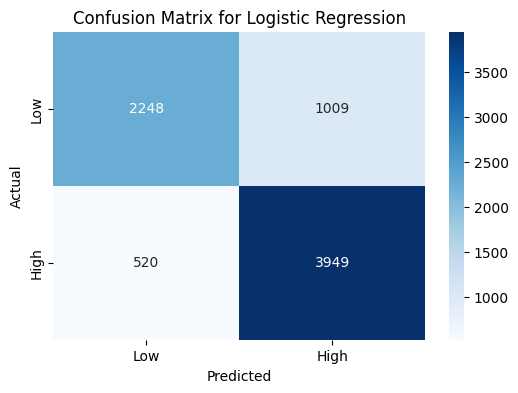

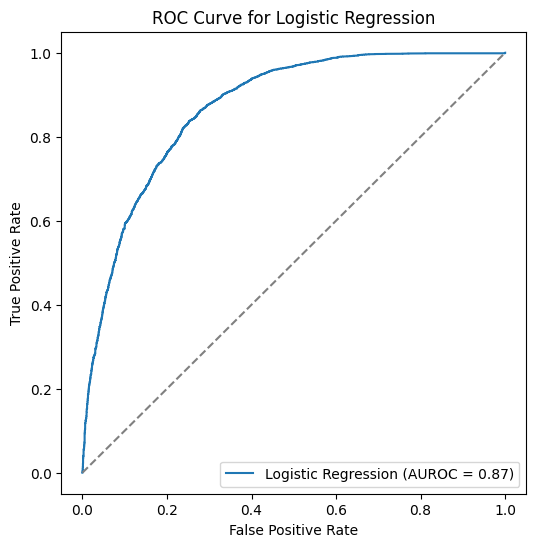

--- SVM ---
Test accuracy: 0.7881180429717836
Precision: 0.7698170731707317
Recall: 0.9040053703289327
F1 Score: 0.831532365956571
Confusion Matrix:
 [[2049 1208]
 [ 429 4040]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.63      0.71      3257
        True       0.77      0.90      0.83      4469

    accuracy                           0.79      7726
   macro avg       0.80      0.77      0.77      7726
weighted avg       0.79      0.79      0.78      7726

Sensitivity (Recall) for SVM: 0.9040053703289327
Specificity for SVM: 0.6291065397605158


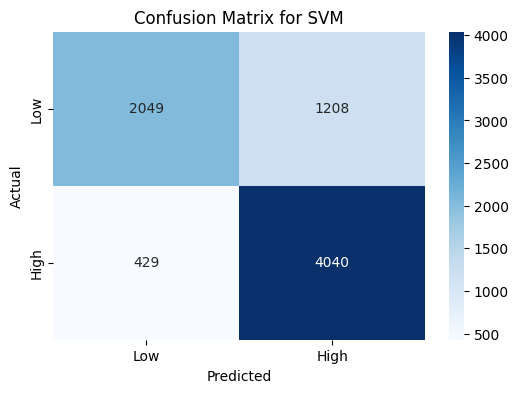

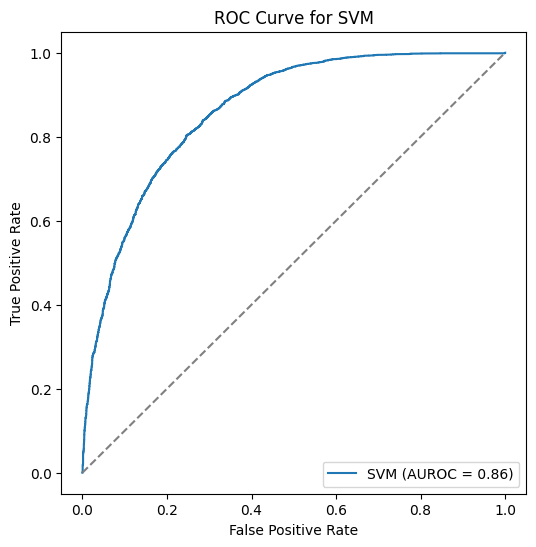

--- KNN ---
Test accuracy: 0.8402795754594874
Precision: 0.8394543546694648
Recall: 0.8950548221078541
F1 Score: 0.8663634394628547
Confusion Matrix:
 [[2492  765]
 [ 469 4000]]
Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.77      0.80      3257
        True       0.84      0.90      0.87      4469

    accuracy                           0.84      7726
   macro avg       0.84      0.83      0.83      7726
weighted avg       0.84      0.84      0.84      7726

Sensitivity (Recall) for KNN: 0.8950548221078541
Specificity for KNN: 0.7651212772490021


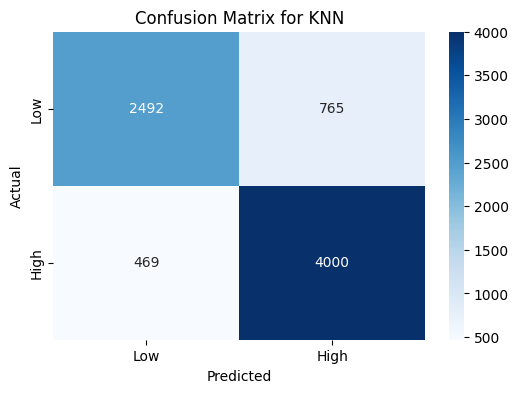

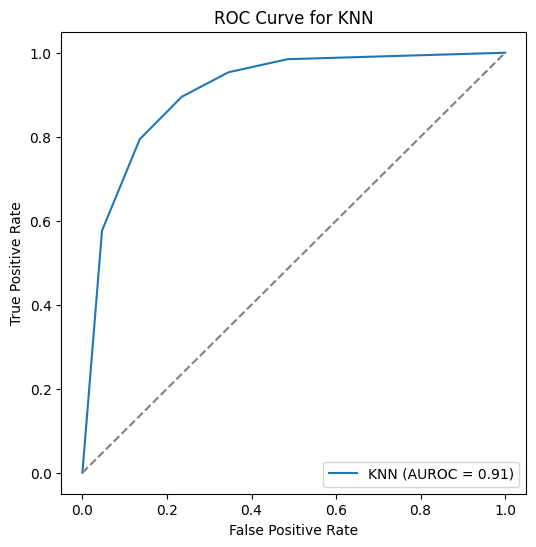

In [10]:
# Prediction and evaluation for all models
models = {'Logistic Regression': myLogRegModel, 
          'SVM': mySVM, 
          'KNN': myKNN}

for model_name, model in models.items():
    ytrain_pred = model.predict(Xtrain)
    ytest_pred = model.predict(Xtest)

    print(f"--- {model_name} ---")
    print("Test accuracy:", accuracy_score(ytest, ytest_pred))
    print("Precision:", precision_score(ytest, ytest_pred))
    print("Recall:", recall_score(ytest, ytest_pred))
    print("F1 Score:", f1_score(ytest, ytest_pred))
    print("Confusion Matrix:\n", confusion_matrix(ytest, ytest_pred))
    print("Classification Report:\n", classification_report(ytest, ytest_pred))
    # Calculate Sensitivity and Specificity
    tn, fp, fn, tp = confusion_matrix(ytest, ytest_pred).ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)  # Specificity
    print(f"Sensitivity (Recall) for {model_name}: {sensitivity}")
    print(f"Specificity for {model_name}: {specificity}")

    # Plot confusion matrix heatmap
    cm = confusion_matrix(ytest, ytest_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    
    # ROC Curve and AUC
    ytest_prob = model.predict_proba(Xtest)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(Xtest)
    fpr, tpr, _ = roc_curve(ytest, ytest_prob)
    roc_auc = roc_auc_score(ytest, ytest_prob)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUROC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    
